Importing the libraries

In [1]:
!pip install tensorflow
!pip install opendatasets


Download and Unzip Dataset from Kaggle

In [2]:
import opendatasets as od


od.download("https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adsjayani
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset


100%|██████████| 38.4M/38.4M [00:00<00:00, 1.04GB/s]

Import Libraries

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix


Prepare and Preprocess the Dataset

In [5]:
# Define dataset path
base_dir = '/content/animal-image-classification-dataset/Animals'

# Create ImageDataGenerator with preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


Build a Simple CNN Model

In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(train_gen.num_classes, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Train the Model

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 66s 859ms/step - accuracy: 0.4480 - loss: 1.2498 - val_accuracy: 0.6800 - val_loss: 0.7291
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 79s 819ms/step - accuracy: 0.6929 - loss: 0.6653 - val_accuracy: 0.6850 - val_loss: 0.6951
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 62s 834ms/step - accuracy: 0.7781 - loss: 0.5543 - val_accuracy: 0.7000 - val_loss: 0.7169
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 62s 832ms/step - accuracy: 0.8518 - loss: 0.4105 - val_accuracy: 0.6967 - val_loss: 0.7023
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 61s 813ms/step - accuracy: 0.8819 - loss: 0.3310 - val_accuracy: 0.6933 - val_loss: 0.8227
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 63s 839ms/step - accuracy: 0.9423 - loss: 0.1917 - val_accuracy: 0.7117 - val_loss: 0.8298
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 62s 831ms/step - accuracy: 0.9672 - loss: 0.1202 - val_accuracy: 0.6917 - val_loss: 0.9650
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 62s 827ms/step - accuracy: 0.9811 - loss: 0.0884 - val_accuracy: 0.723

Plot Training and Validation Graphs

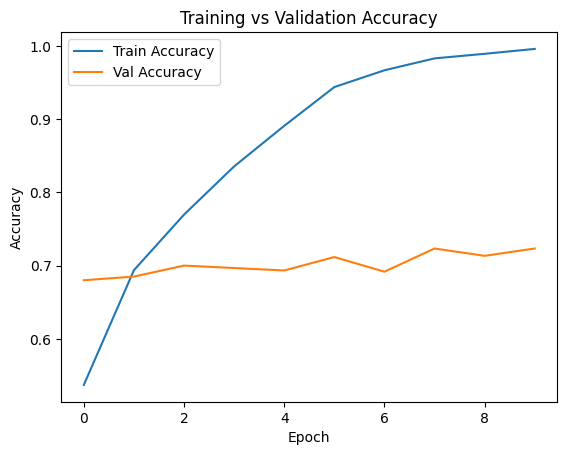

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


Evaluate the Model

In [9]:
val_gen.reset()
predictions = model.predict(val_gen)
y_pred = np.argmax(predictions, axis=1)
y_true = val_gen.classes


print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 533ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.38      0.37       200
           1       0.34      0.36      0.35       200
           2       0.34      0.31      0.33       200

    accuracy                           0.35       600
   macro avg       0.35      0.35      0.35       600
weighted avg       0.35      0.35      0.35       600

Confusion Matrix:
 [[75 69 56]
 [65 72 63]
 [69 69 62]]


Visualize Some Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


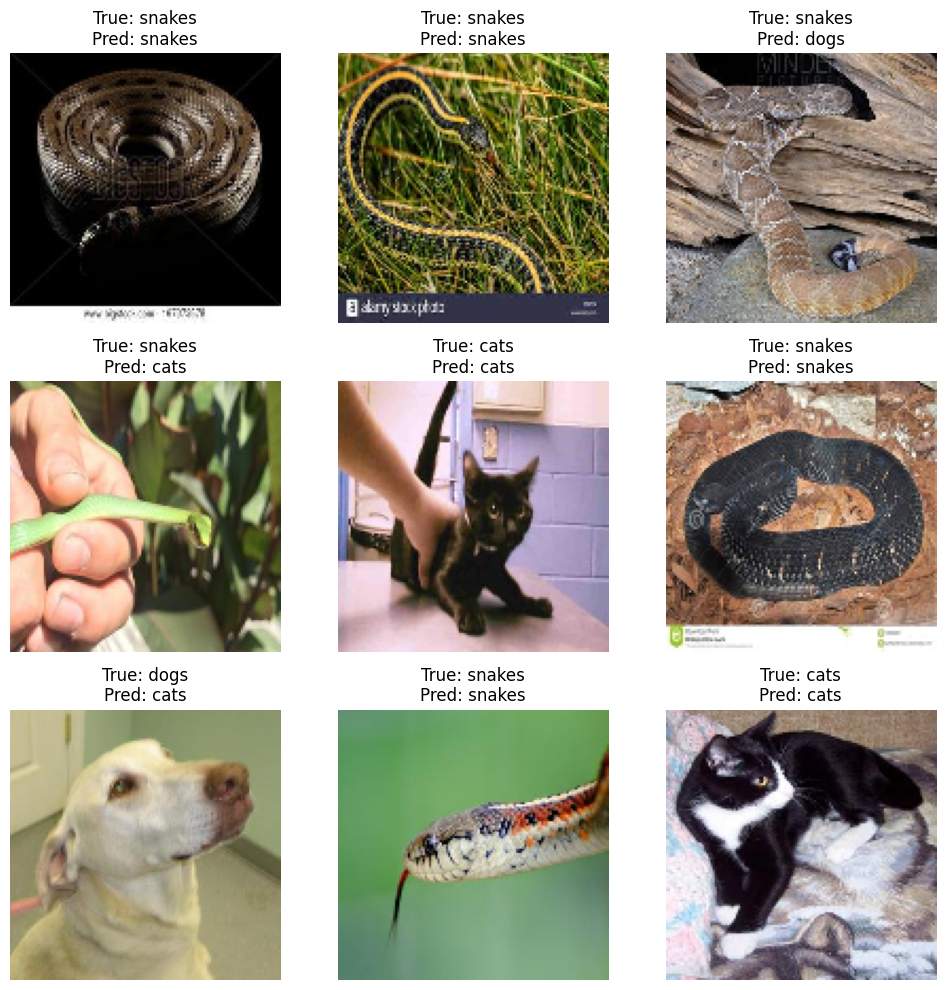

In [10]:
class_names = list(val_gen.class_indices.keys())

def show_sample_predictions(generator, model, class_names):
    x_batch, y_batch = next(generator)
    preds = model.predict(x_batch)
    pred_labels = np.argmax(preds, axis=1)
    true_labels = np.argmax(y_batch, axis=1)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_batch[i])
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_predictions(val_gen, model, class_names)
